In [35]:
import pandas as pd
import pickle
from collections import defaultdict


In [29]:

rates_delay_loss = defaultdict(lambda: defaultdict(list))

# rates_delay_loss = {
#                                    "bandwidth_prediction": [],
#                                    "sending_rate": [],
#                                    "receiving_rate": [],
#                                    "delay": [],
#                                    "loss_ratio": [],
#                                    "log_prediction": [],
#                                    "reward": []
#                                    }

n_steps = 1000
counter_trace = 0
done=False

for step in range(n_steps):
    
    to_append = f"{step}_bla"

    rates_delay_loss["a"][counter_trace].append(to_append)
    rates_delay_loss["b"][counter_trace].append(to_append)
    
    if step%300 == 0:
        print("Im in first if", step)
        done=True
        counter_trace +=1
        



Im in first if 0
Im in first if 300
Im in first if 600
Im in first if 900


In [77]:
#TD3, 50000

alg = "SAC"
iteration = 90000
pickle_path = f"../output/rates_delay_loss_{alg}_{iteration}.pickle"
l_rate = pd.read_pickle(pickle_path)

time_step = 200

In [79]:
len(l_rate['./traces/WIRED_35mbps.json']["bandwidth_prediction"])

307

In [81]:
l_rate['./traces/WIRED_35mbps.json']["bandwidth_prediction"]

[148824,
 148824,
 704182,
 552645,
 262648,
 615401,
 683662,
 690218,
 49172,
 349405,
 493385,
 504728,
 217116,
 544044,
 668646,
 690104,
 660764,
 715072,
 735136,
 731531,
 732123,
 746992,
 755760,
 754088,
 755933,
 757596,
 758135,
 758098,
 758437,
 759018,
 758900,
 758297,
 758022,
 758456,
 758603,
 758576,
 758579,
 758642,
 758638,
 758635,
 758635,
 758638,
 751000,
 750301,
 755791,
 760914,
 756654,
 757636,
 758324,
 758213,
 758060,
 758511,
 758126,
 758314,
 759019,
 759389,
 758993,
 758855,
 757942,
 760173,
 760208,
 760842,
 758886,
 759327,
 758964,
 759445,
 741674,
 740672,
 753891,
 763300,
 745355,
 747260,
 755251,
 760863,
 755610,
 757628,
 758120,
 758738,
 758154,
 758131,
 758505,
 759194,
 759378,
 758853,
 736610,
 738092,
 752979,
 762639,
 756229,
 756537,
 758344,
 758570,
 758320,
 758358,
 758098,
 758486,
 758490,
 758064,
 758447,
 758506,
 758067,
 757811,
 47073,
 420914,
 536521,
 477142,
 232613,
 575264,
 671342,
 687974,
 662812,
 71

In [68]:
l_rate["bandwidth_prediction"].keys()

dict_keys(['./traces/WIRED_900kbps.json'])

In [48]:
l_rate["bandwidth_prediction"][0] == l_rate["bandwidth_prediction"][1] == l_rate["bandwidth_prediction"][4]

False

In [50]:
len(l_rate["bandwidth_prediction"][3])

133

In [51]:
133+289+289+289

1000

In [70]:
289+289

578

In [84]:
import json
import glob
import os

trace_dir = os.path.join("..", "traces")
print(trace_dir)
# trace_dir = os.path.join(os.path.dirname(__file__), "gym_folder", "alphartc_gym", "tests", "data")
trace_set = glob.glob(f'{trace_dir}/**/*.json', recursive=True)
print(trace_set)

../traces


In [85]:
trace_set

['../traces/4G_3mbps.json',
 '../traces/WIRED_900kbps.json',
 '../traces/4G_700kbps.json',
 '../traces/5G_13mbps.json',
 '../traces/trace_300k.json',
 '../traces/trace_loss_pattern_3.json',
 '../traces/4G_500kbps.json',
 '../traces/WIRED_200kbps.json',
 '../traces/5G_12mbps.json',
 '../traces/WIRED_35mbps.json']

In [86]:
trace = trace_set[0]
trace

'../traces/4G_3mbps.json'

In [115]:
import matplotlib.pyplot as plt
from plot_cdf import plot_cdf
import numpy as np

In [117]:
np.sort(cap_kbps)[:-3]

array([     0,      0,      0,     40,     40,    200,    320,   1320,
         1320,   1320,   1520,   1560,   1720,   1840,   1920,   2120,
         2320,   2400,   3080,   3640,   4680,   5590,   5800,   6400,
         6760,   6950,   8330,   9900,  10600,  10800,  11400,  11800,
        12500,  12900,  13100,  13400,  13500,  13500,  13900,  14000,
        14100,  15000,  16600,  17300,  17300,  17600,  17700,  17700,
        17800,  18200,  18600,  18700,  19000,  19200,  19500,  19800,
        19800,  20100,  20300,  20800,  21100,  21300,  21600,  22000,
        22200,  22300,  22400,  22400,  22400,  22400,  22700,  22800,
        23100,  23400,  23500,  23500,  23700,  23900,  24300,  24500,
        24500,  24700,  24800,  24800,  25000,  25100,  25100,  25200,
        25200,  25700,  26000,  26000,  26200,  26200,  26300,  26400,
        26400,  26800,  27000,  27100,  27300,  27400,  27500,  27800,
        28000,  28000,  28100,  28400,  28600,  28700,  28800,  28900,
      

../traces/4G_3mbps.json


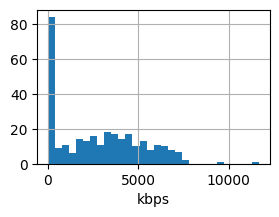

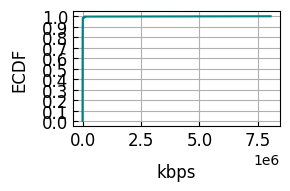



../traces/WIRED_900kbps.json


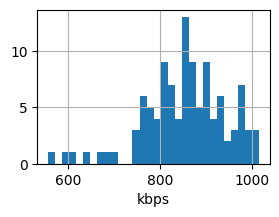

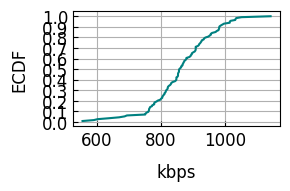



../traces/4G_700kbps.json


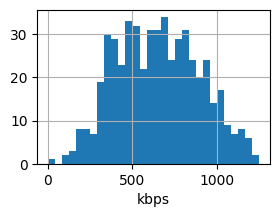

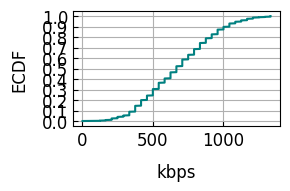



../traces/5G_13mbps.json


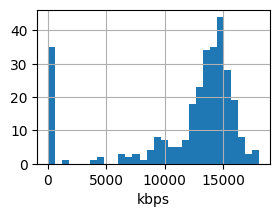

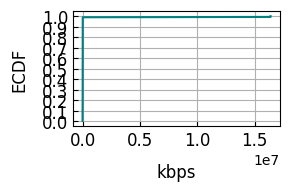



../traces/trace_300k.json


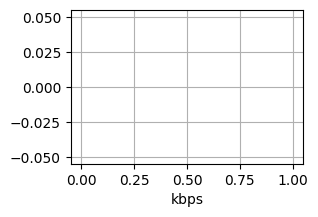

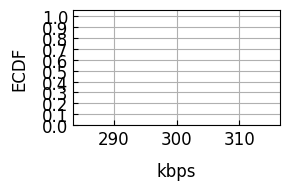



../traces/trace_loss_pattern_3.json


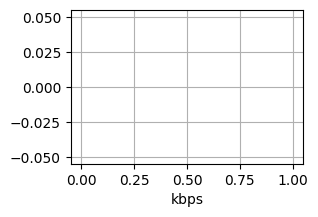

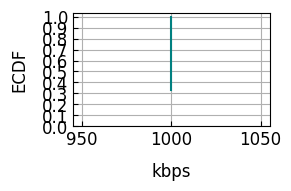



../traces/4G_500kbps.json


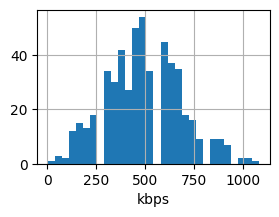

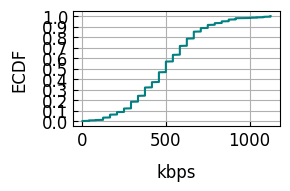



../traces/WIRED_200kbps.json


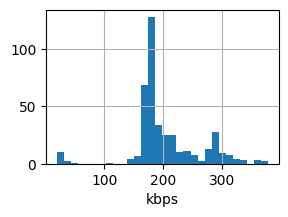

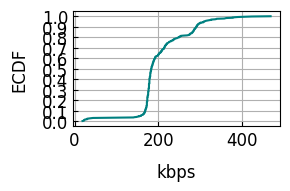



../traces/5G_12mbps.json


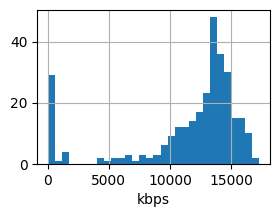

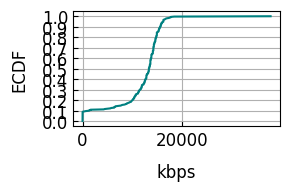



../traces/WIRED_35mbps.json


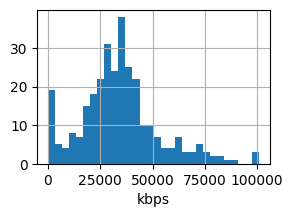

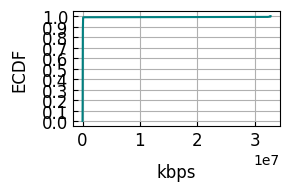

In [149]:
big_list = []

for trace in trace_set:
    with open(trace, "r") as f:
        data = json.load(f)
    
    cap_kbps = []
    print(trace)

    for i in data["uplink"]["trace_pattern"]:
        cap_kbps.append(i["capacity"])
    plt.figure(figsize=(3,2))
    plt.hist(np.sort(cap_kbps)[:-5], bins=30)
    plt.xlabel("kbps")
    plt.grid()
    plt.show()

    plot_cdf(cap_kbps, "kbps", figsize=(3,2))
    plt.show()

    print("\n")
    big_list.append(data["uplink"]["trace_pattern"])

In [150]:
# len(big_list)

10

In [152]:
from collections import defaultdict
big_trace2 = defaultdict(dict)

big_trace2["uplink"]["trace_pattern"] = big_trace

In [ ]:
with open('../big_trace/big_trace.json', 'w') as fout:
    json.dump(big_trace , fout)

In [153]:
len(big_trace2["uplink"]["trace_pattern"])

2819

In [154]:
with open('../big_trace/big_trace2.json', 'w') as fout:
    json.dump(big_trace2 , fout)

In [151]:
big_trace = [item for sublist in big_list for item in sublist]

for d in big_trace:
    print(d["capacity"])

0
1720
1240
2200
3
2080
3040
2640
1920
0
0
0
0
80100
4600
560
0
3570
1160
160
3600
8039999
4880
4400
2560
3440
3840
2680
0
440
5360
4360
5920
4480
1560
0
2400
2600
4440
3760
3320
3120
3800
3440
2800
4120
4120
2480
4160
3760
2280
4520
4440
3160
0
2200
3640
3640
5890
6070
0
0
4130
999
0
4080
3200
5400
5400
3280
5440
5870
5
7050
6320
5200
4840
6880
5880
3440
4960
5280
2640
5200
4760
2240
0
801
3400
3200
4640
4080
2080
3400
3680
520
0
0
0
2280
2240
1160
0
1800
7590
11700
3320
1640
520
1360
2
320
0
2760
1520
0
800
1320
0
0
0
0
80100
4160
0
80100
4520
679
0
4570
2360
0
3200
3080
0
1880
3240
0
200
6530
0
440
7280
4280
6920
7330
1680
0
3440
3040
0
1960
3840
5320
6730
4680
0
280
6160
2760
5640
4760
1920
0
2920
3840
0
2200
4160
0
1600
5280
0
401
5390
4930
6390
6200
2600
2600
4290
2600
0
1600
3920
0
0
6480
0
0
4690
1080
0
4400
1800
0
2360
1920
0
240
4360
0
40
4040
2120
3160
5150
760
0
3560
1760
0
0
120
0
1280
3200
0
1520
4320
3680
4600
4320
160
0
1560
1080
0
3570
2840
6570
6800
5920
0
240
6530
0


In [155]:
step_time = 200

with open('../big_trace/big_trace.json', "r") as f:
    d = json.load(f)
df = pd.DataFrame(d)
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
s = pd.Series(index=pd.to_datetime(time, unit="ms"), data=capacities)
capacities = s.resample(f"{step_time}ms").ffill()

In [156]:
capacities

1970-01-01 00:00:00.000        0.0
1970-01-01 00:00:00.200        0.0
1970-01-01 00:00:00.400     1720.0
1970-01-01 00:00:00.600     1240.0
1970-01-01 00:00:00.800     2200.0
                            ...   
1970-01-01 00:13:17.800    72100.0
1970-01-01 00:13:18.000    35400.0
1970-01-01 00:13:18.200    26000.0
1970-01-01 00:13:18.400    22000.0
1970-01-01 00:13:18.600    57400.0
Freq: 200L, Length: 3994, dtype: float64

(0.0, 10000.0)

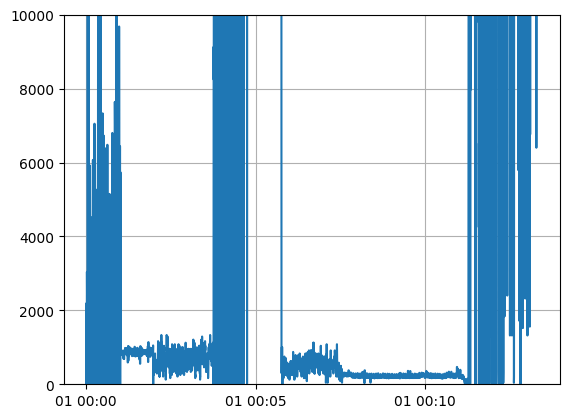

In [157]:
plt.plot(capacities)
plt.grid()
plt.ylim((0, 10000))